In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
column_names = ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation',\
                'relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
filename = '../adult.data'
df_adult_train = pd.read_csv(filename,header=None,names=column_names)


In [4]:
df_adult_train.shape

(32561, 15)

In [5]:
df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_adult_train.shape

(32561, 15)

In [7]:
df_adult_train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df_adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df_adult_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df_adult_train_orig = df_adult_train

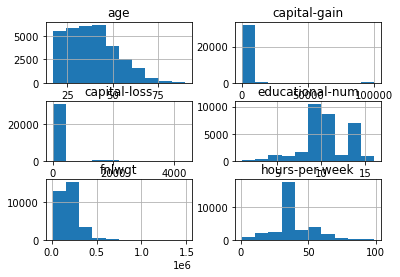

In [11]:

df_adult_train.hist()
plt.show()

In [12]:
cat_cols = list(df_adult_train.select_dtypes(exclude=["int64", "float"]))
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [13]:
num_cols = list(df_adult_train.select_dtypes(exclude=["object"]))
num_cols


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

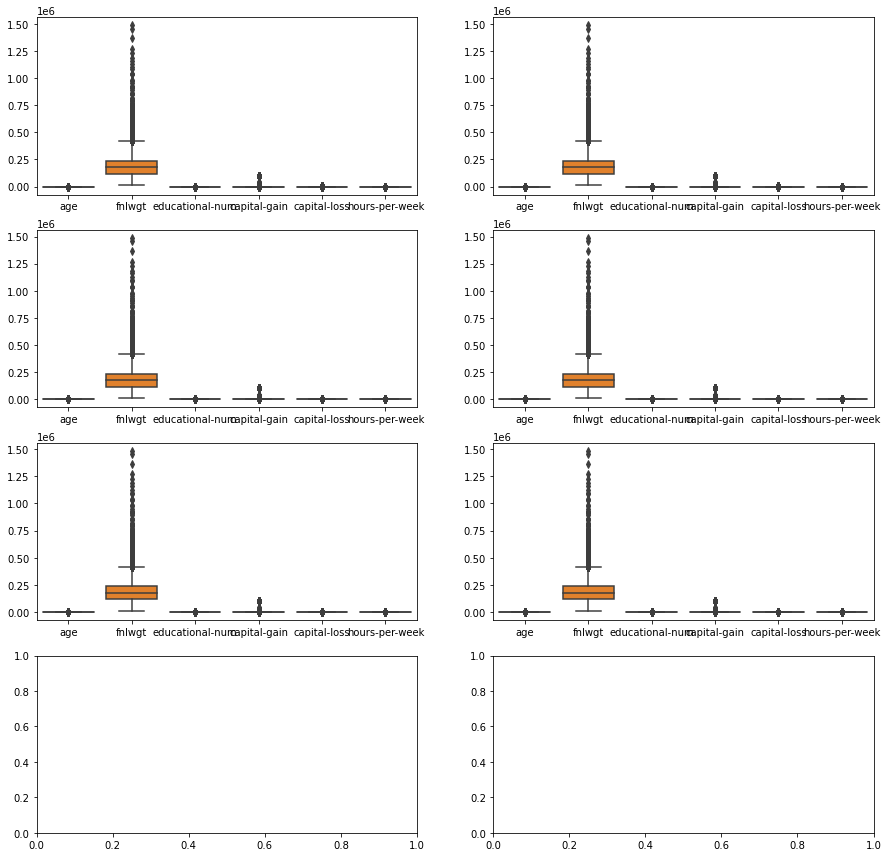

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
i = j = 0
for col in num_cols:
    g = sns.boxplot(data=df_adult_train, ax=axs[i][j])
    j += 1
    if j>1:
        i += 1; j = 0

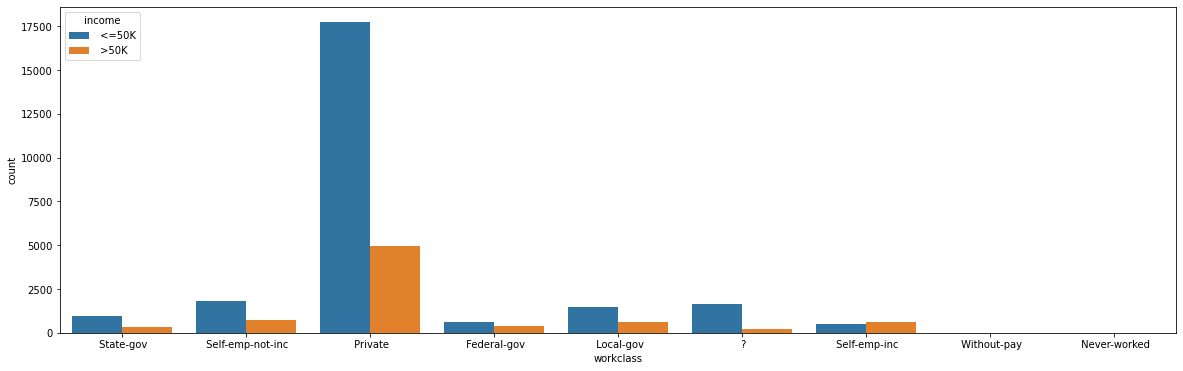

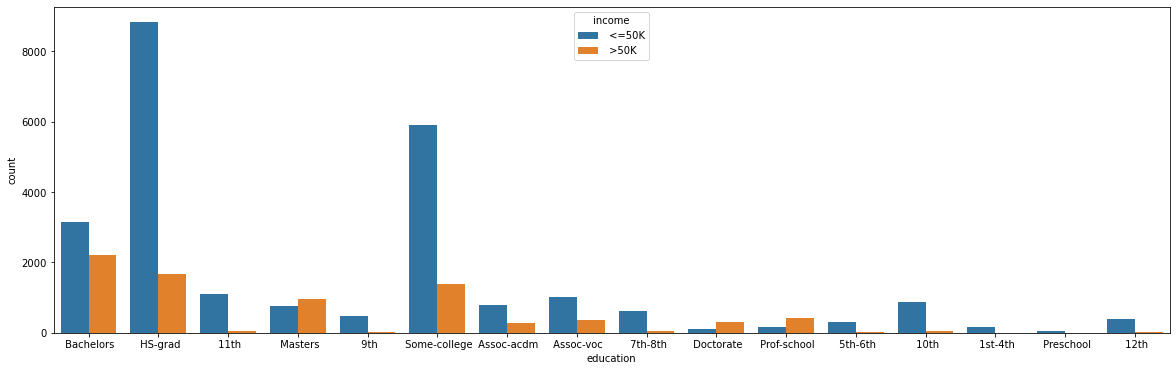

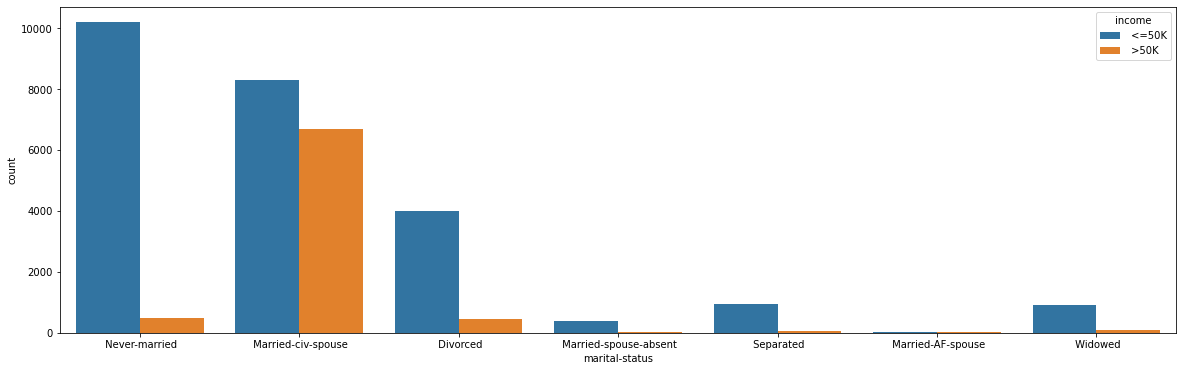

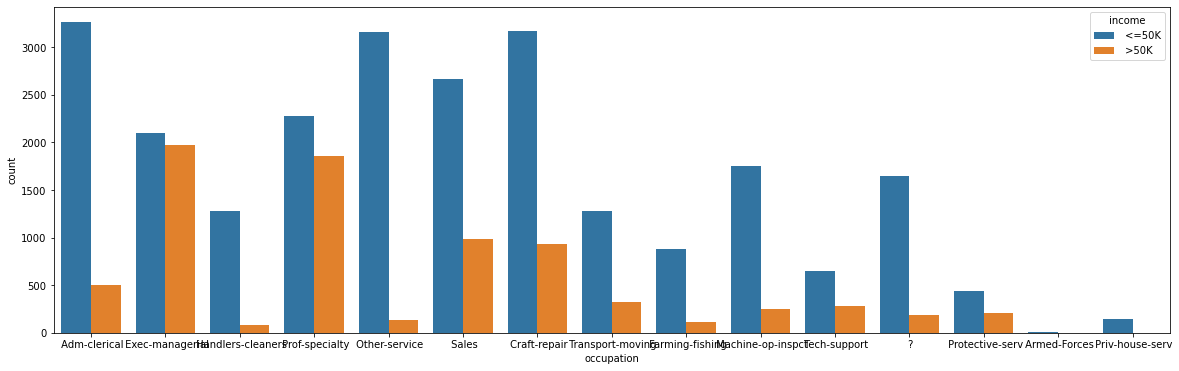

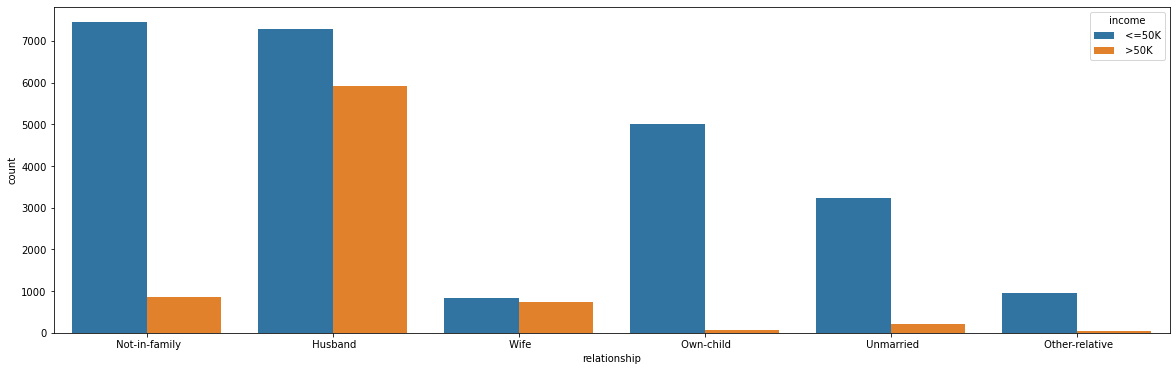

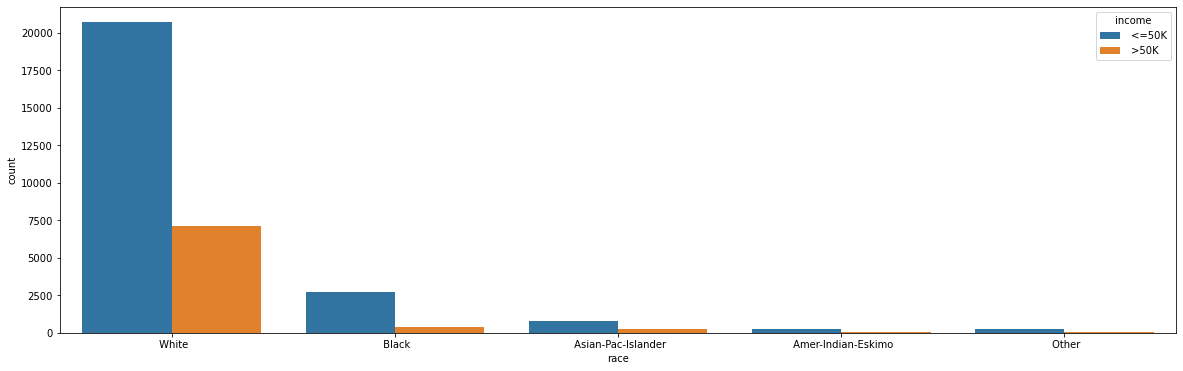

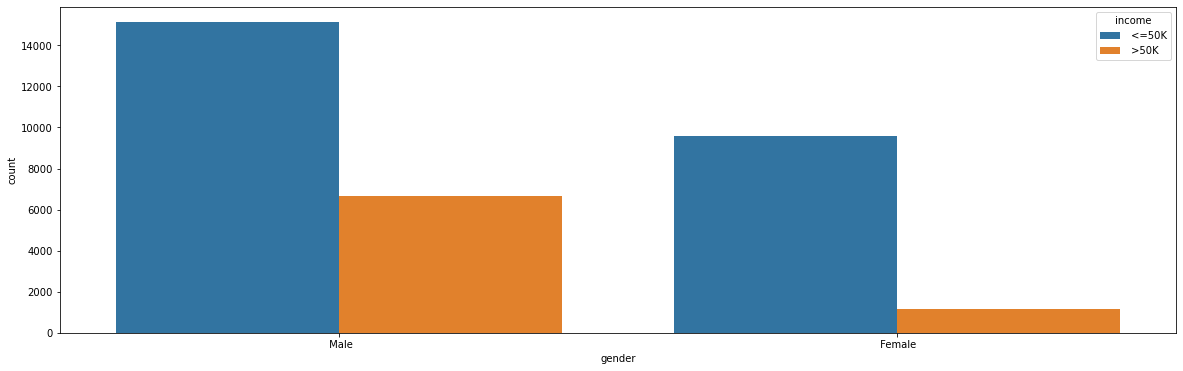

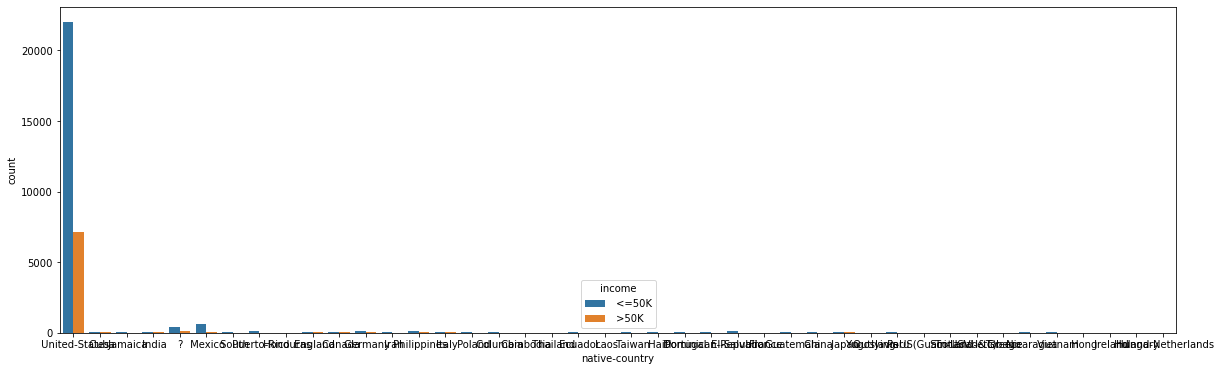

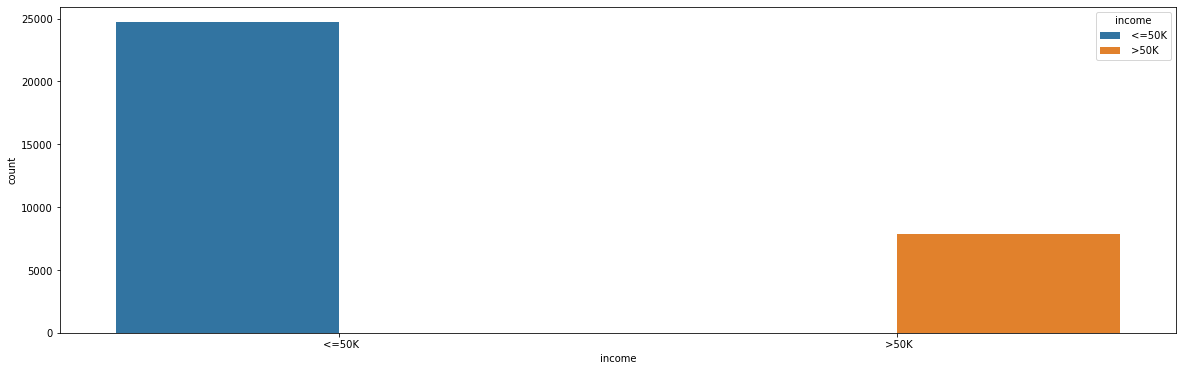

In [15]:
for col in cat_cols:
    plt.figure (figsize=(20,6))
    ax = sns.countplot(x=col, hue = 'income', data=df_adult_train)



In [16]:

col_corr = set()  
# finding correlation
corr_val = df_adult_train.corr(method='pearson')
corr_val

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
educational-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


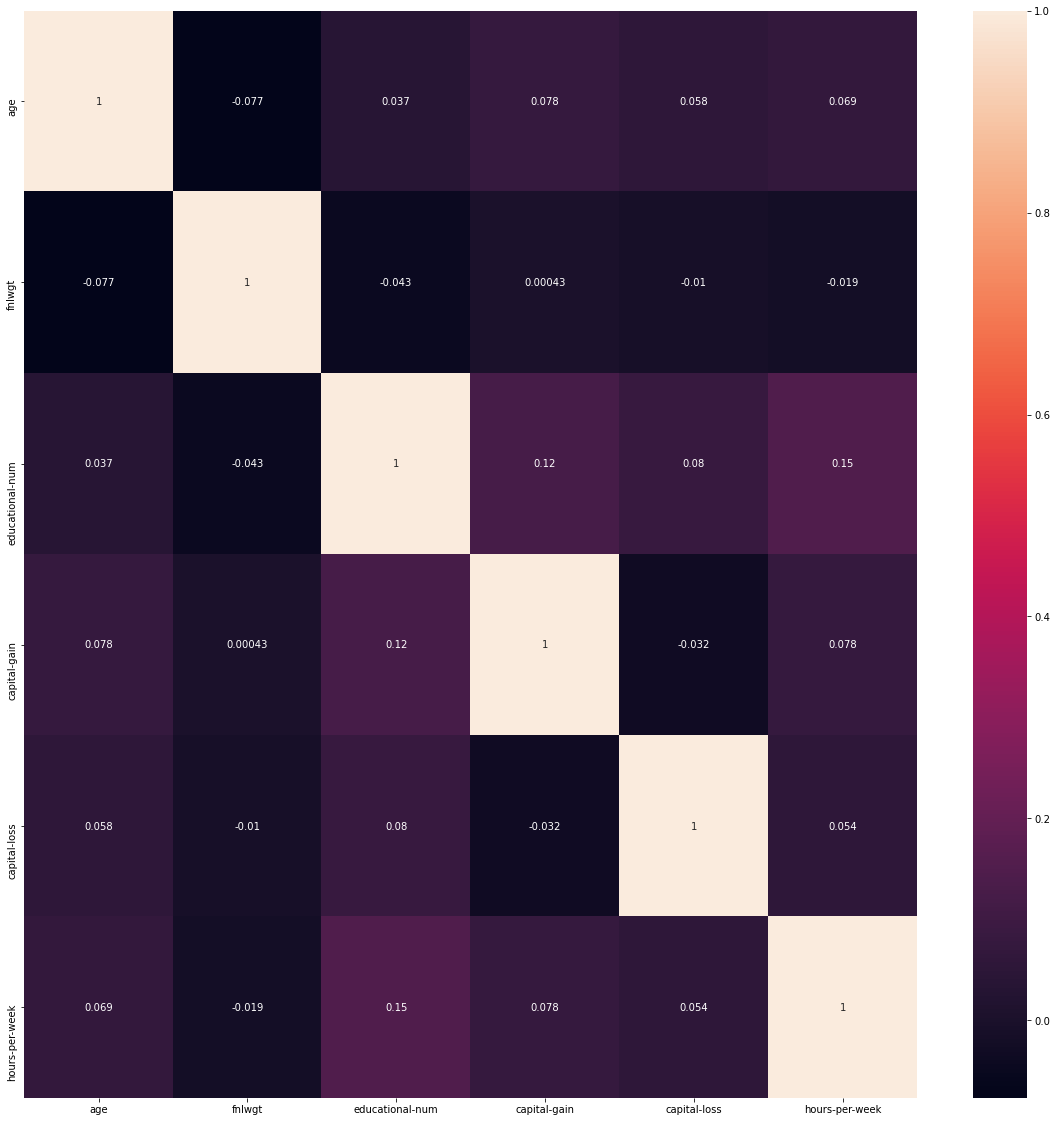

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_val,annot=True)
plt.show()

In [18]:
# label encode categorical columns
le = LabelEncoder()

for col in cat_cols:
    df_adult_train[col]= le.fit_transform(df_adult_train[col])

df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [19]:
# check VIF

vif = pd.DataFrame()
vif['columns'] = df_adult_train.columns
vif["VIF"] = [variance_inflation_factor(df_adult_train.values, i) for i in range(df_adult_train.shape[1])]
vif


,columns,VIF
0,age,8.612915
1,workclass,8.492594
2,fnlwgt,4.033151
3,education,9.239470
4,educational-num,19.641550
5,marital-status,4.071643
6,occupation,3.711141
7,relationship,2.649283
8,race,17.591432
9,gender,4.462940


In [21]:
x = df_adult_train.drop(columns=['income'])
y = df_adult_train['income']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)


In [23]:

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=2)


In [24]:
y_train.head()

7665     0
7086     0
11712    1
17876    0
17493    1
Name: income, dtype: int32

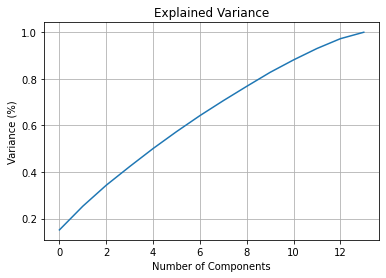

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_train)
plt.figure()
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [26]:

pca = PCA(n_components=10)
new_data = pca.fit_transform(x_train)
# This will be the new data fed to the algorithm.
principal_df = pd.DataFrame(data = new_data, columns = ['1', '2','3','4','5','6','7','8','9','10'])

In [27]:
principal_df.head()

,1,2,3,4,5,6,7,8,9,10
0,-1.311364,-0.292147,1.261035,1.507852,-1.517664,-0.406221,0.896949,-1.196577,0.743802,-1.161315
1,-1.475188,-0.135854,-0.921070,-1.137044,0.614551,0.085919,-0.531945,0.431223,-0.688093,0.211221
2,0.615460,0.795009,0.253585,-0.312957,1.358768,-0.252533,0.759413,-0.354670,-0.174509,0.075083
3,0.466518,2.871390,3.093315,-0.381797,-0.314181,-0.171434,-1.119639,-0.070581,0.701234,-0.258792
4,0.938115,-0.169068,-0.167204,-0.212706,1.571006,-0.303002,0.959674,-0.582471,-0.516267,0.278326


In [28]:
model = XGBClassifier(objective='binary:logistic')
model.fit(principal_df, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [29]:
# cheking initial test accuracy
new_data = pca.fit_transform(x_test)
# This will be the new data fed to the algorithm.
test_df = pd.DataFrame(data = new_data, columns = ['1', '2','3','4','5','6','7','8','9','10'])


In [32]:
y_pred = model.predict(test_df)

In [33]:
y_test[0:10]

16054    1
32382    0
10749    0
15377    0
29660    0
13111    0
6973     1
24252    0
12937    1
21092    0
Name: income, dtype: int32

In [34]:
pd.Series(y_pred)[0:10]

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
dtype: int32

In [35]:
model.score(test_df,y_test)

0.6456136759136043

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      7148
           1       0.33      0.30      0.31      2621

    accuracy                           0.65      9769
   macro avg       0.54      0.54      0.54      9769
weighted avg       0.64      0.65      0.64      9769



In [47]:
from sklearn.metrics import accuracy_score
score_xgboost = accuracy_score(y_test,y_pred)
print('The accuracy of the xgboost is', score_xgboost)

The accuracy of the xgboost is 0.6456136759136043


In [48]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(principal_df, y_train)

score_logreg = logreg.score(test_df,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.6667007882075955


In [49]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(principal_df, y_train)

score_randomforest = randomforest.score(test_df,y_test)
print('The accuracy of RandomForestClassifier is', score_randomforest)

The accuracy of RandomForestClassifier is 0.6248336574879721


In [50]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(principal_df, y_train)

score_knn = knn.score(test_df,y_test)
print('The accuracy of KNeighborsClassifier  is', score_knn)


The accuracy of KNeighborsClassifier  is 0.691268297676323


In [52]:
import pickle 
filename = 'knn.pickle'
pickle.dump(knn, open(filename, 'wb'))